In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
from os import chdir
chdir("F:/Etlhive/Loan Prediction Project/")

Read Data

In [3]:
import pandas as pd
A = pd.read_csv("training_set.csv")

In [4]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


Drop unwanted columns

In [5]:
B = A.drop(labels=["Loan_ID"],axis=1)

Missing Data Treatment

In [6]:
from PM8wdnew import replacer
replacer(B)

Define X and Y

In [7]:
Y = B[["Loan_Status"]]
X = B.drop(labels=["Loan_Status"],axis=1)

In [8]:
from PM8wdnew import preprocessing
Xnew = preprocessing(X)

Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y.Loan_Status = le.fit_transform(Y)

In [10]:
Y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [11]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

Create NN

In [13]:
#pip install keras

In [14]:
#pip install TensorFlow

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [16]:
nn = Sequential()
nn.add(Dense(500,input_dim=(Xnew.shape[1])))
nn.add(Dense(500))
nn.add(Dropout(0.2))
nn.add(Dense(500))
nn.add(Dropout(0.2))
nn.add(Dense(1,activation="sigmoid"))

In [17]:
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model = nn.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
13/13 [==============================] - 3s 71ms/step - loss: 0.7207 - accuracy: 0.7423 - val_loss: 0.7395 - val_accuracy: 0.7677
Epoch 2/50
13/13 [==============================] - 0s 29ms/step - loss: 0.5477 - accuracy: 0.7781 - val_loss: 0.7661 - val_accuracy: 0.7071
Epoch 3/50
13/13 [==============================] - 0s 25ms/step - loss: 0.5287 - accuracy: 0.7832 - val_loss: 0.6239 - val_accuracy: 0.6566
Epoch 4/50
13/13 [==============================] - 0s 24ms/step - loss: 0.5483 - accuracy: 0.7653 - val_loss: 0.5353 - val_accuracy: 0.7879
Epoch 5/50
13/13 [==============================] - 0s 25ms/step - loss: 0.4997 - accuracy: 0.7908 - val_loss: 0.5536 - val_accuracy: 0.8182
Epoch 6/50
13/13 [==============================] - 0s 25ms/step - loss: 0.5310 - accuracy: 0.7934 - val_loss: 0.5948 - val_accuracy: 0.8081
Epoch 7/50
13/13 [==============================] - 0s 21ms/step - loss: 0.4912 - accuracy: 0.7908 - val_loss: 0.6877 - val_accuracy: 0.5657
Epoch 8/50
13

In [18]:
tr = model.history["loss"]

In [19]:
ts = model.history["val_loss"]

In [20]:
acc = model.history["accuracy"]
valacc = model.history["val_accuracy"]

In [21]:
#acc
valacc

[0.7676767706871033,
 0.7070707082748413,
 0.6565656661987305,
 0.7878788113594055,
 0.8181818127632141,
 0.808080792427063,
 0.5656565427780151,
 0.8181818127632141,
 0.7373737096786499,
 0.7979797720909119,
 0.808080792427063,
 0.808080792427063,
 0.747474730014801,
 0.7979797720909119,
 0.747474730014801,
 0.7979797720909119,
 0.808080792427063,
 0.7878788113594055,
 0.747474730014801,
 0.7878788113594055,
 0.7979797720909119,
 0.7777777910232544,
 0.8181818127632141,
 0.7878788113594055,
 0.7878788113594055,
 0.8181818127632141,
 0.7676767706871033,
 0.7878788113594055,
 0.808080792427063,
 0.7777777910232544,
 0.808080792427063,
 0.7979797720909119,
 0.7878788113594055,
 0.808080792427063,
 0.7979797720909119,
 0.808080792427063,
 0.7979797720909119,
 0.808080792427063,
 0.808080792427063,
 0.8282828330993652,
 0.8181818127632141,
 0.7979797720909119,
 0.7979797720909119,
 0.7878788113594055,
 0.808080792427063,
 0.7979797720909119,
 0.8181818127632141,
 0.7878788113594055,
 0.808

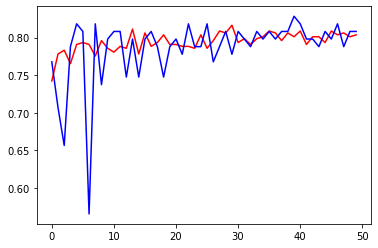

In [22]:
import matplotlib.pyplot as plt
plt.plot(acc,c="red")
plt.plot(valacc,c="blue")

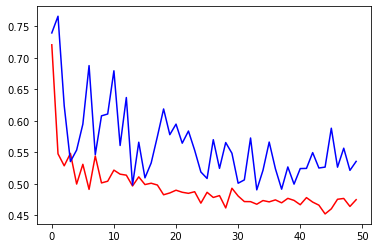

In [23]:
import matplotlib.pyplot as plt
plt.plot(tr,c="red")
plt.plot(ts,c="blue")

In [24]:
tr_pred = []
for i in nn.predict(xtrain):
    if(i>0.5):
        tr_pred.append(1)
    else:
        tr_pred.append(0)

ts_pred = []
for i in nn.predict(xtest):
    if(i>0.5):
        ts_pred.append(1)
    else:
        ts_pred.append(0)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
print("Training accuracy",tr_acc)
print("Testing accuracy",ts_acc)

4/4 [==============================] - 0s 6ms/step
Training accuracy 0.8105906313645621
Testing accuracy 0.7886178861788617


Import Testing Data

In [25]:
C = pd.read_csv("testing_set.csv")

In [26]:
C = C.drop(labels=["Loan_ID"],axis=1)

In [27]:
replacer(C)

In [28]:
from PM8wdnew import preprocessing
test = preprocessing(C)

In [29]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [30]:
#test

In [31]:
nn.predict(test) #Probability values

12/12 [==============================] - 0s 7ms/step


array([[0.8928261 ],
       [0.7793581 ],
       [0.8589114 ],
       [0.7869739 ],
       [0.7213572 ],
       [0.70819277],
       [0.7306932 ],
       [0.03859909],
       [0.92613345],
       [0.6856387 ],
       [0.70242816],
       [0.80059725],
       [0.75925803],
       [0.20374271],
       [0.83777595],
       [0.7256092 ],
       [0.8455468 ],
       [0.9068334 ],
       [0.6162515 ],
       [0.7975709 ],
       [0.76038575],
       [0.7903135 ],
       [0.7911336 ],
       [0.65632683],
       [0.6282746 ],
       [0.00108552],
       [0.80072296],
       [0.70847297],
       [0.85577893],
       [0.74071515],
       [0.78070194],
       [0.89363545],
       [0.7720734 ],
       [0.7785014 ],
       [0.84881127],
       [0.02867101],
       [0.89616185],
       [0.858837  ],
       [0.8340659 ],
       [0.70577246],
       [0.8897998 ],
       [0.76651055],
       [0.8355487 ],
       [0.7586441 ],
       [0.79439855],
       [0.5748623 ],
       [0.73756546],
       [0.714

In [32]:
Q = []
for i in nn.predict(test):
    if(i[0] < 0.5):
        Q.append(0)
    else:
        Q.append(1)

12/12 [==============================] - 0s 7ms/step


In [33]:
Q

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [34]:
pred = le.inverse_transform(Q)

In [35]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [36]:
C = pd.read_csv("testing_set.csv")

In [37]:
D = C[["Loan_ID"]]

In [38]:
D['Loan_Status_predicted'] = pred

In [39]:
D

,Loan_ID,Loan_Status_predicted
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [41]:
D.to_csv("F:/Etlhive/Loan Prediction Project/loanpreddl.csv")